In [1]:
import pandas as pd
def blastp2df(blastresult):
    # read the file
    with open(blastresult) as f: # blastresult file  
        x = f.readlines()
    
    # parsedList is a list of splitted lines from each line of blastresult file
    parsedList = []
    for i in range(len(x)):
        parsedList.append(x[i].rstrip().split('\t')) # each line has 12 elements
    
    # make parsedList into a dataframe
    df = pd.DataFrame(parsedList,
                  columns = ['query_id',
                             'subject_id',
                             'pct_identity',
                             'aln_length',
                             'n_of_mismatches',
                             'gap_openings',
                             'q_start',
                             'q_end',
                             's_start',
                             's_end',
                             'e_value',
                             'bit_score'])
    
    # change to appropriate datatype
    df[['pct_identity','e_value','bit_score']] = df[['pct_identity','e_value','bit_score']].astype('float')
    df[['aln_length','n_of_mismatches','gap_openings','q_start','q_end','s_start','s_end']] = df[['aln_length','n_of_mismatches','gap_openings','q_start','q_end','s_start','s_end']].astype('int')
    
    # return dataframe
    return(df)

In [2]:
df = blastp2df("/home/hermuba/data0118/cdhit/blast_two/Escherichia0.70Klebsiella0.70")

Text(0.5,1,'Escherichia0.70 - Klebsiella 0.70')

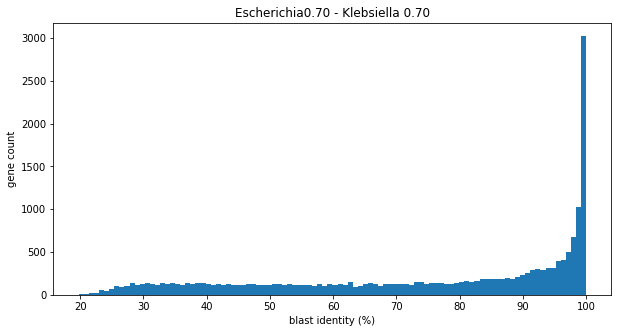

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['pct_identity'], bins = 100)
ax.set_xlabel('blast identity (%)')
ax.set_ylabel('gene count')
ax.set_title('Escherichia0.70 - Klebsiella 0.70')



In [6]:
df2 = blastp2df('/home/hermuba/data0118/cdhit/blast_two/Escherichia0.70Acinetobacter0.70')


Text(0.5,1,'Escherichia0.70 - Acinetobacter 0.70')

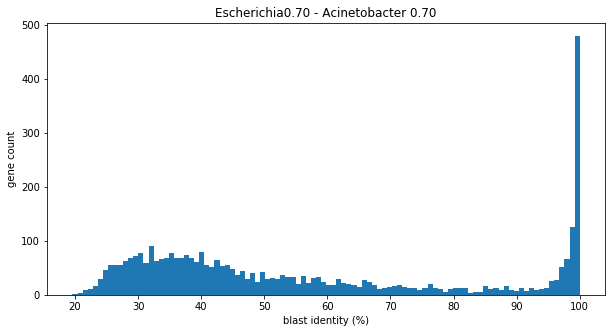

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df2['pct_identity'], bins = 100)
ax.set_xlabel('blast identity (%)')
ax.set_ylabel('gene count')
ax.set_title('Escherichia0.70 - Acinetobacter 0.70')

In [27]:
two_dim = df2[['query_id','pct_identity']].merge(df[['query_id','pct_identity']], on = 'query_id', suffixes=('_Acinetobacter', '_Klebsiella'))

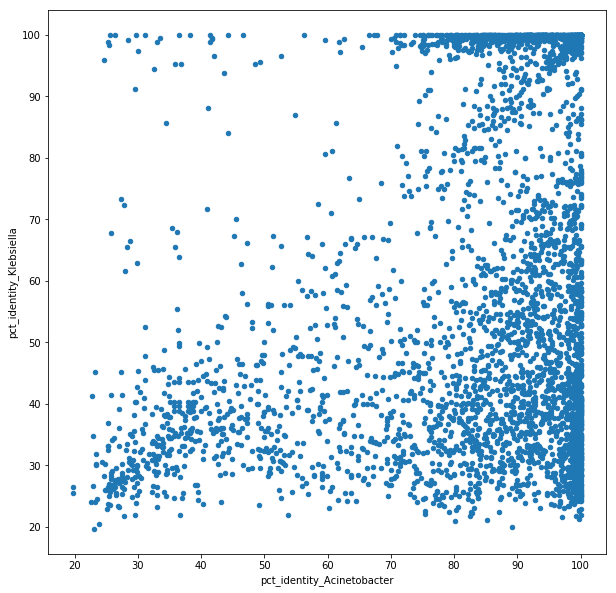

In [25]:
two_dim.plot(kind = 'scatter', x = 'pct_identity_Acinetobacter', y = 'pct_identity_Klebsiella', figsize = (10,10))


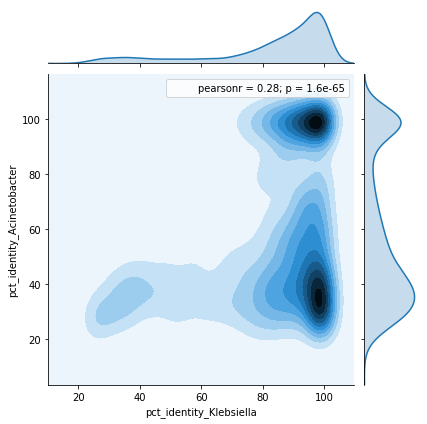

In [28]:
# library & dataset
import seaborn as sns

 
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=two_dim["pct_identity_Klebsiella"], y=two_dim["pct_identity_Acinetobacter"], kind='kde')

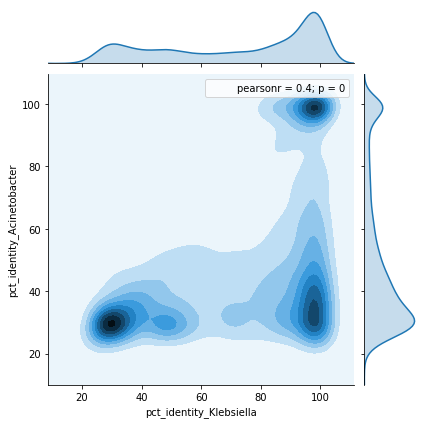

In [31]:
df2 = blastp2df('/home/hermuba/data0118/cdhit/blast_two/Escherichia0.80Acinetobacter0.80')
df = blastp2df('/home/hermuba/data0118/cdhit/blast_two/Escherichia0.80Klebsiella0.80')
two_dim = df2[['query_id','pct_identity']].merge(df[['query_id','pct_identity']], on = 'query_id', suffixes=('_Acinetobacter', '_Klebsiella'))
sns.jointplot(x=two_dim["pct_identity_Klebsiella"], y=two_dim["pct_identity_Acinetobacter"], kind='kde')

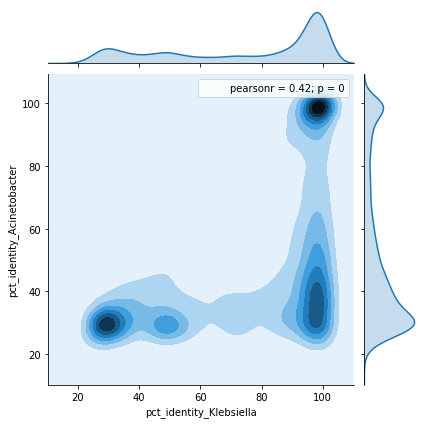

In [32]:
df2 = blastp2df('/home/hermuba/data0118/cdhit/blast_two/Escherichia0.95Acinetobacter0.95')
df = blastp2df('/home/hermuba/data0118/cdhit/blast_two/Escherichia0.95Klebsiella0.95')
two_dim = df2[['query_id','pct_identity']].merge(df[['query_id','pct_identity']], on = 'query_id', suffixes=('_Acinetobacter', '_Klebsiella'))
sns.jointplot(x=two_dim["pct_identity_Klebsiella"], y=two_dim["pct_identity_Acinetobacter"], kind='kde')